COGS 108- FINAL PROJECT

NAME: Alexis Lee
GITHUB: aml159

Research Question:
What are the most pleasant (safe/least police visits and best ratings) SD Parks and Rec locations?

Hypothesis: The most pleasant SD Parks and Rec locations will be those that are more private and have scheduled activities.

Data:

SETUP

In [88]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
yelp_info = pd.read_csv('yelp_SD_parks.csv')
yelp_reviews = pd.read_csv('yelp_SD_reviews.csv')

budget_data = pd.read_csv('actuals_operating_datasd.csv')
budget_dic = pd.read_csv('operating_actuals_dictionary_datasd.csv')

crime2019_data = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
crime2020_data = pd.read_csv('pd_calls_for_service_2020_datasd.csv')

DATA CLEANING

In [4]:
pb = budget_data[budget_data['dept_name']=='Parks & Recreation'].drop_duplicates(subset=["account"])
pb = pb.sort_values(by= 'account')

In [30]:
y_info = yelp_info.drop(columns=['phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'])

In [ ]:
cd9 = crime2019_data.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_dir_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting'])
cd9 = cd9.drop_duplicates(subset=['address_number_primary', 'address_road_primary', 'address_sfx_primary'])
cd9 = cd9.dropna(subset = ['address_number_primary', 'address_road_primary', 'address_sfx_primary'])

DATA ANALYSIS

In [53]:
addresses = pd.DataFrame(columns=['ad'])
for i in range(len(cd9)):
    ad  = str.lower(str(cd9['address_number_primary'].iloc[i]))
    ad = ad+str(' ')+str.lower(str(cd9['address_road_primary'].iloc[i]))
    ad = ad+str(' ')+str.lower(str(cd9['address_sfx_primary'].iloc[i]))
    addresses.loc[i,'ad']=ad

In [50]:
num = 0
for i in y_info['address']:
    i=i.split(",", 1)[0]
    i = i[0:i.find('San Diego')]
    y_info.loc[num,'ad']=str.lower(i)
    num=num+1


In [69]:
addresses['ad']

0         3800 national ave
1        6500 reflection dr
2                0 06th ave
3                0 vesta st
4                0 04th ave
                ...        
29262           0 dahlia st
29263        9600 murray dr
29264         0 tiverton rd
29265      2600 cagayan ave
29266       0 alta vista st
Name: ad, Length: 29267, dtype: object

In [68]:
y_info['ad']

0                        1549 el prado 
1                     7960 civita blvd 
2                     1600 pacific hwy 
3             adams ave and florida st 
4                    413 1st st coronad
                     ...               
828                                    
829         1255 imperial ave ste 1000 
830                      100 park blvd 
831    2700 carlsbad village dr carlsba
832          4949 s mission rd fallbroo
Name: ad, Length: 833, dtype: object

In [76]:
y_info['rat*rev']= y_info['rating']*y_info['review_count']

<BarContainer object of 833 artists>

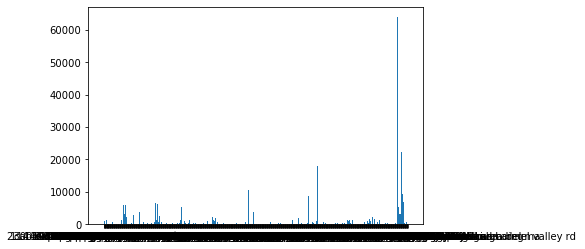

In [84]:
plt.bar(y_info['ad'], y_info['rat*rev'])

In [86]:
y_info.sort_values(by='rat*rev')

,name,address,rating,review_count,ad,rat*rev
506,Penasquitas Casa Blanca,"9404 Twin Trails Dr San Diego, CA 92129",1.0,1,9404 twin trails dr,1.0
134,City of Lakeside,"12652 Woodside Ave Lakeside, CA 92040",1.0,1,12652 woodside ave lakesid,1.0
155,Sunnyslope Park,"2600 Elm St San Diego, CA 92102",1.0,1,2600 elm st,1.0
568,Lakeview Mobile Estates,"809 Discovery St Spc 28 San Marcos, CA 92078",1.0,1,809 discovery st spc 28 san marco,1.0
572,Vista Terrace Neighborhood Park,"301 Athey Ave San Ysidro, CA 92173",1.0,1,301 athey ave san ysidr,1.0
...,...,...,...,...,...,...
586,CUCINA urbana,"1735 Hancock St San Diego, CA 92101",4.5,3987,1735 hancock st,17941.5
557,San Diego Zoo,"2920 Zoo Dr San Diego, CA 92101",4.5,4549,2920 zoo dr,20470.5
814,Hodad's,"5010 Newport Ave San Diego, CA 92107",4.0,5548,5010 newport ave,22192.0
585,Extraordinary Desserts,"1430 Union St San Diego, CA 92101",4.0,7700,1430 union st,30800.0
